# Data Analysis Fundamentals
## Analyzing and Visualizing Data
### Aggregating Data
Aggergating data is often the first analysis you want to perform in order to summarize the data and get a feel for it as a whole. Often it is common to count the number of rows of data you have and the sum of your numeric values. So lets get started up load in our data. 

In [14]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('data/Lemonade-2.csv', index_col = 'Date', parse_dates = True, na_values = 'nan' )
df_2_week = df.head(14)
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Date,,,,,,,
2017-01-01,Sunday,80.60,2.00,15,0.3,10,3.0
2017-02-01,Monday,84.02,1.33,15,0.3,13,3.9
2017-03-01,Tuesday,94.10,1.33,27,0.3,15,4.5
2017-04-01,Wednesday,111.38,1.05,28,0.3,17,5.1
2017-05-01,Thursday,108.32,1.00,33,0.3,18,5.4


In [15]:
df_2_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2017-01-01 to 2017-01-14
Data columns (total 7 columns):
Day            14 non-null object
Temperature    14 non-null float64
Rainfall       14 non-null float64
Flyers         14 non-null int64
Price          14 non-null float64
Sales          14 non-null int64
Revenue        14 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 896.0+ bytes


Using .info() we will be able to see the count and data types but for our data it better we use .describe()

In [16]:
df_2_week.describe()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
count,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000
mean,97.121429,1.317857,23.000000,3.000000e-01,14.642857,4.392857
std,11.269380,0.272910,6.101702,5.760664e-17,2.590133,0.777040
min,77.540000,1.000000,15.000000,3.000000e-01,10.000000,3.000000
25%,90.815000,1.082500,19.000000,3.000000e-01,13.000000,3.900000
50%,99.500000,1.330000,23.000000,3.000000e-01,15.000000,4.500000
75%,106.430000,1.487500,27.750000,3.000000e-01,17.000000,5.100000
max,111.380000,2.000000,33.000000,3.000000e-01,18.000000,5.400000


The only thing that is missing from .describe() is the sum() but that can be simple as running .sum()

In [17]:
df_2_week.sum()

Day            SundayMondayTuesdayWednesdayThursdayFridaySatu...
Temperature                                               1359.7
Rainfall                                                   18.45
Flyers                                                       322
Price                                                        4.2
Sales                                                        205
Revenue                                                     61.5
dtype: object

Some of the sum values are potentially useful such as total number of sales, total flyer distributed, total revenue and total rain fall. The rest don't seem too have much potential such as total temperature and total price. The power of the mean is it give us a good feel of a typicial value of the field in the dataset as a whole. The min is the lowest value and max is the highest. We can see that rosie mininum sale in these two weeks was \$10 and her highest selling day was \$18.

## Grouping and Summarizing Data
When our data includes categorical it may be a good idea to group the data by these catagories can calculate subtotals

In [18]:
df_2_week.groupby('Day').describe()

Flyers                                                  Price       \
           count  mean        std   min    25%   50%    75%   max count mean   
Day                                                                            
Friday       2.0  21.0   2.828427  19.0  20.00  21.0  22.00  23.0   2.0  0.3   
Monday       2.0  17.5   3.535534  15.0  16.25  17.5  18.75  20.0   2.0  0.3   
Saturday     2.0  21.0   2.828427  19.0  20.00  21.0  22.00  23.0   2.0  0.3   
Sunday       2.0  21.5   9.192388  15.0  18.25  21.5  24.75  28.0   2.0  0.3   
Thursday     2.0  24.5  12.020815  16.0  20.25  24.5  28.75  33.0   2.0  0.3   
Tuesday      2.0  30.0   4.242641  27.0  28.50  30.0  31.50  33.0   2.0  0.3   
Wednesday    2.0  25.5   3.535534  23.0  24.25  25.5  26.75  28.0   2.0  0.3   

            ...    Sales       Temperature                             \
            ...      75%   max       count    mean        std     min   
Day         ...                                                         
Friday      ...    14.00  15.0         2.0   88.52  15.528065   77.54   
Monday      ...    16.00  17.0         2.0   92.30  11.709688   84.02   
Saturday    ...    16.00  17.0         2.0  101.30  14.255273   91.22   
Sunday      ...    13.75  15.0         2.0   90.05  13.364318   80.60   
Thursday    ...    17.00  18.0         2.0  104.54   5.345727  100.76   
Tuesday     ...    17.25  18.0         2.0  102.11  11.327851   94.10   
Wednesday   ...    15.75  17.0         2.0  101.03  14.637110   90.68   

                                             
               25%     50%      75%     max  
Day                                          
Friday      83.030   88.52   94.010   99.50  
Monday      88.160   92.30   96.440  100.58  
Saturday    96.260  101.30  106.340  111.38  
Sunday      85.325   90.05   94.775   99.50  
Thursday   102.650  104.54  106.430  108.32  
Tuesday     98.105  102.11  106.115  110.12  
Wednesday   95.855  101.03  106.205  111.38  

[7 rows x 48 columns]

In [19]:
df_2_week.groupby('Day').sum()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Day,,,,,,
Friday,177.04,2.87,42,0.6,26,7.8
Monday,184.60,2.51,35,0.6,30,9.0
Saturday,202.60,2.59,42,0.6,30,9.0
Sunday,180.10,3.18,43,0.6,25,7.5
Thursday,209.08,2.33,49,0.6,32,9.6
Tuesday,204.22,2.38,60,0.6,33,9.9
Wednesday,202.06,2.59,51,0.6,29,8.7


In [20]:
df.groupby('Day').mean()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Day,,,,,,
Friday,142.042308,0.817115,40.326923,0.330769,25.384615,8.630769
Monday,141.599231,0.823462,39.788462,0.334615,25.461538,8.788462
Saturday,141.675385,0.823077,38.403846,0.334615,25.346154,8.803846
Sunday,139.585660,0.873585,40.320755,0.333962,24.830189,8.566038
Thursday,142.025000,0.812500,40.711538,0.334615,25.673077,8.863462
Tuesday,139.899615,0.829423,41.057692,0.334615,25.134615,8.675000
Wednesday,142.419615,0.806154,41.384615,0.334615,25.442308,8.732692


In [8]:
df.groupby('Price').mean()

,Temperature,Rainfall,Flyers,Sales,Revenue,Unnamed: 8
Price,,,,,,
0.3,57.038614,0.873960,37.871287,23.726073,7.117822,NaN
0.5,78.777419,0.595161,52.080645,33.129032,16.564516,NaN


## Visualizing Data
While you may understand a lot from exampling tables of data and creating aggregations, it is generally easier to identify and explore trends and replationships in your data by creating visualization usually refered to as graphs, plots or charts. First thing we may want to check out is how our revenue looks over time.

[Text(0,0.5,'Revenue in $'),
 Text(0.5,1,'Revenue over first two weeks of the year')]

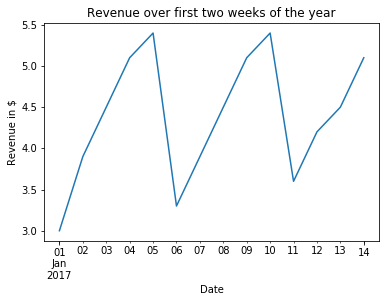

In [9]:
ax = df_2_week["Revenue"].plot()
ax.set(ylabel="Revenue in $", title = "Revenue over first two weeks of the year")


We start with a simple line chart where we plot out our data then connect them with lines. We can see that the vertical access represents the Revenue values while the horizontal axis represents the Date. Another common chart is a pie chart, where each slice of the pie chart represents a category.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D017373978>],
      dtype=object)

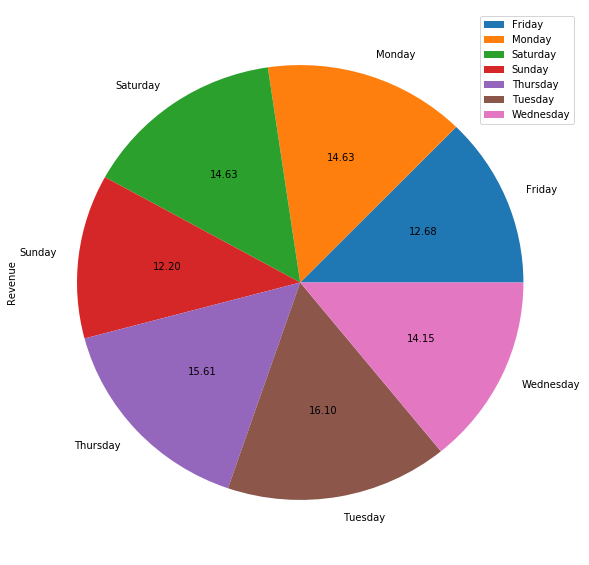

In [10]:
df_2_week.loc[:,['Day', 'Revenue']].groupby('Day').mean().plot(kind = 'pie', subplots=True, figsize=(10, 10),autopct='%.2f')


Bar chart can also be used to help customers understand where a class may stand when compared to each other. 

[Text(0,0.5,'Revenue in $'), Text(0.5,1,'Bar Chart of Revenue Divied by Day')]

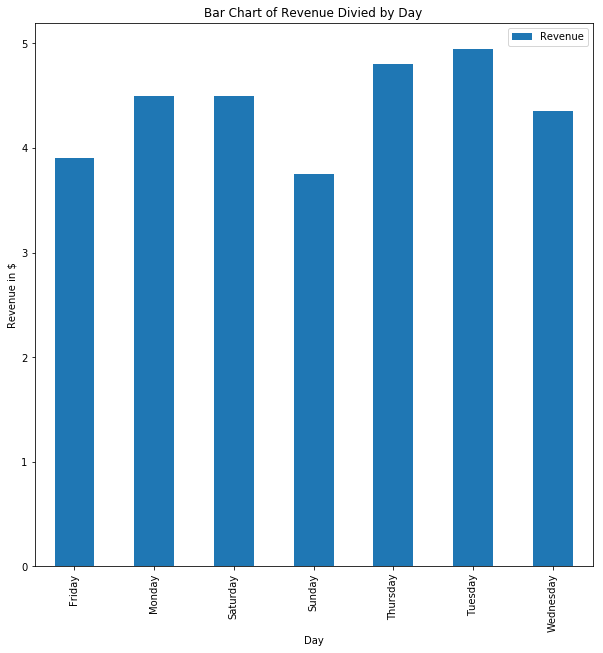

In [11]:
ax2 = df_2_week.loc[:,['Day', 'Revenue']].groupby('Day').mean().plot(kind = 'bar', figsize=(10, 10))
ax2.set(title='Bar Chart of Revenue Divied by Day', ylabel= 'Revenue in $')

We are also able to group our data when ploting, in the example below we group by days while also ploting different prices based on these grouping. 

Text(0.5,1,'Bar Chart of Revenue by By Day and Price')

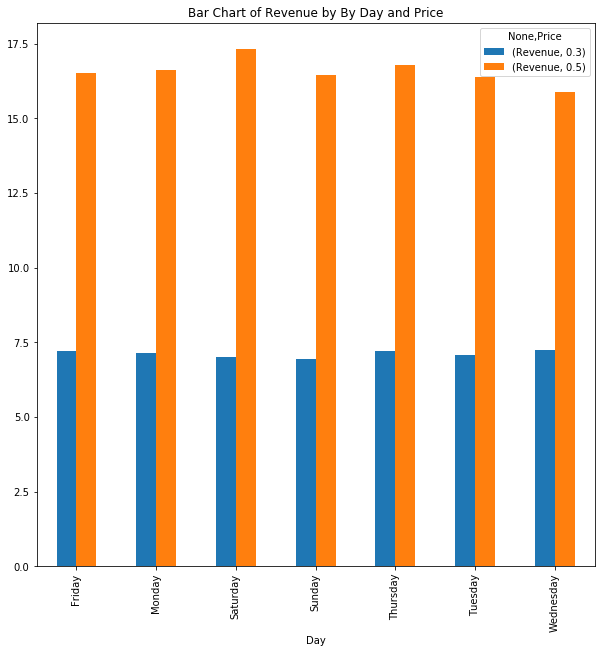

In [12]:
ax3 = df.loc[:,['Day', 'Revenue', 'Price']].groupby(['Day', 'Price']).mean().unstack().plot.bar( figsize=(10, 10))
ax3.set_title("Bar Chart of Revenue by By Day and Price")

Lastly scatter plot are use to find a distribution of the data, outlier are more apparent.

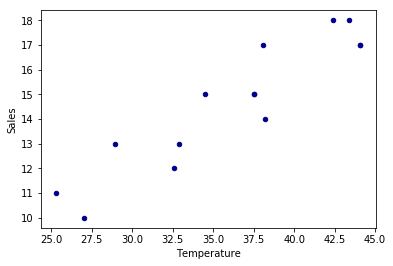

In [13]:
df_2_week.loc[:,['Temperature', 'Sales']].plot(kind = 'scatter', x='Temperature', y='Sales', c='DarkBlue')